In [ ]:
from disentangle.data_loader.nikola_7D_rawdata_loader import (
    get_raw_files_dict,
    load_one_fpath,
    NikolaChannelList,
    get_train_val_data,
)
from disentangle.config_utils import load_config
import os
import numpy as np
from disentangle.core.data_split_type import DataSplitType

datadir = "/group/jug/ashesh/data/nikola_data/20240531/"
pkl_fpath = "/home/ashesh.ashesh/training/disentangle/2408/D25-M3-S0-L8/4"
config = load_config(pkl_fpath)
test_data = get_train_val_data(
    datadir,
    config.data,
    DataSplitType.Test,
    val_fraction=config.training.val_fraction,
    test_fraction=config.training.test_fraction,
)


# fnames = get_raw_files_dict()['500ms']
# fname = fnames[0]
# fnames
# data = load_one_fpath(os.path.join(datadir,fname),[NikolaChannelList.Ch_B, NikolaChannelList.Ch_C, NikolaChannelList.Ch_D,
#    ])

Loading from /group/jug/ashesh/data/nikola_data/20240531/Set1/uSplit_500ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set2/uSplit_500ms.nd2
ND2 dimensions: {'P': 11, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set3/uSplit_500ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set4/uSplit_500ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set5/uSplit_500ms.nd2
ND2 dimensions: {'P': 21, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data/nikola_data/20240531/Set6/uSplit_500ms.nd2
ND2 dimensions: 

In [ ]:
import os

picaso_pred_dir = (
    "/home/ashesh.ashesh/code/Disentangle_notwantingtouse//disentangle/notebooks/naturemethods/picassoResults"
)
picasso_input_dir = "/home/ashesh.ashesh/code/Disentangle_notwantingtouse//disentangle/notebooks/naturemethods/"
all_files = sorted(os.listdir(picaso_pred_dir))

In [ ]:
easy_files = [f"picasso_input_nicola_BCD_alpha_2.5_{i}_unmixed.tif" for i in range(10)]
hard_files = [f"picasso_input_nicola_BCD_alpha_1.5_{i}_unmixed.tif" for i in range(10)]
picasso_easy_input_fnames = [f"picasso_input_nicola_BCD_alpha_1.5_{i}.tif" for i in range(10)]
picasso_hard_input_fnames = [f"picasso_input_nicola_BCD_alpha_2.5_{i}.tif" for i in range(10)]

In [ ]:
from disentangle.core.tiff_reader import load_tiff


def load_tiffs(paths):
    data = [load_tiff(path)[None] for path in paths]
    return np.concatenate(data, axis=0)


picasso_easy_pred = load_tiffs([os.path.join(picaso_pred_dir, f) for f in easy_files])
picasso_hard_pred = load_tiffs([os.path.join(picaso_pred_dir, f) for f in hard_files])
picasso_easy_input = load_tiffs([os.path.join(picasso_input_dir, f) for f in picasso_easy_input_fnames])
picasso_hard_input = load_tiffs([os.path.join(picasso_input_dir, f) for f in picasso_hard_input_fnames])
print(picasso_easy_pred.shape, picasso_hard_pred.shape, picasso_easy_input.shape, picasso_hard_input.shape)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

(10, 1608, 1608, 3) (10, 1608, 1608, 3) (10, 1608, 1608, 3) (10, 1608, 1608, 3)


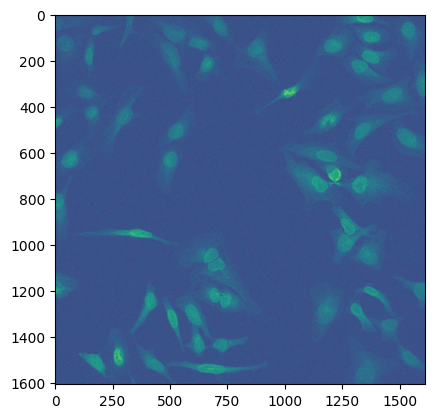

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(picasso_easy_input[0, ..., 0])

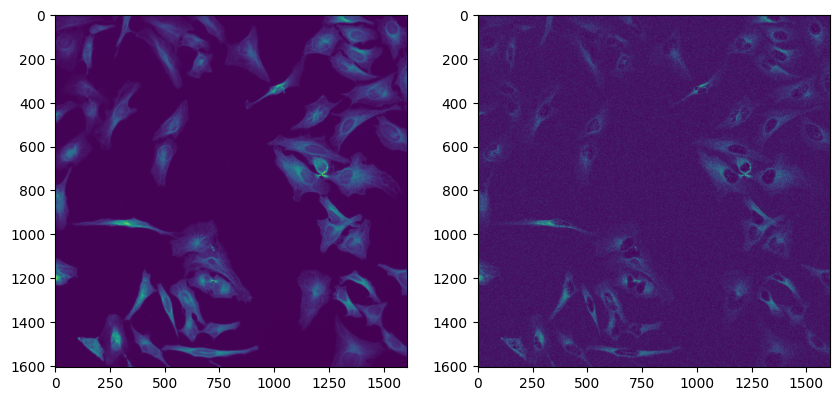

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 5), ncols=2)
ax[0].imshow(test_data[0, ..., 0])
ax[1].imshow(picasso_easy_pred[0, ..., 0])

In [8]:
from disentangle.scripts.evaluate import compute_high_snr_stats
# compute_high_snr_stats(test_data[...,:3], picasso_easy_pred, verbose=True)

In [ ]:
compute_high_snr_stats(test_data[..., :3], picasso_hard_pred, verbose=True)

100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


PSNR on Highres 24.05+-0.779	24.08+-0.587	31.62+-0.454
MicroSSIM on Highres 0.633+-0.021	0.898+-0.007	0.858+-0.026
MicroS3IM on Highres 0.754+-0.019	0.865+-0.011	0.914+-0.006
SSIM on Highres 0.002+-0.001	0.000+-0.000	0.003+-0.001
MSSSIM on Highres 0.084+-0.023	0.016+-0.002	0.159+-0.022


{'rangeinvpsnr': [(np.float64(24.05), np.float64(0.779)),
  (np.float64(24.08), np.float64(0.587)),
  (np.float64(31.62), np.float64(0.454))],
 'microssim': [(np.float64(0.6325020134633708),
   np.float64(0.020857911886915857)),
  (np.float64(0.8978398962389992), np.float64(0.006850663919773917)),
  (np.float64(0.8581196584789256), np.float64(0.026207922497031917))],
 'ms3im': [(np.float32(0.7538723), np.float64(0.019447220038308777)),
  (np.float32(0.8653511), np.float64(0.011463224381172931)),
  (np.float32(0.9139616), np.float64(0.005898525176491084))],
 'ssim': [(np.float64(0.0019240711524933084),
   np.float64(0.0008921365213688984)),
  (np.float64(8.178140043965678e-05), np.float64(1.4469987528728931e-05)),
  (np.float64(0.003232701400139146), np.float64(0.0005111161039552189))],
 'msssim': [(np.float64(0.08388116285204887),
   np.float64(0.022825585976251644)),
  (np.float64(0.015733776707202198), np.float64(0.002154997981529)),
  (np.float64(0.1588467974215746), np.float64(0.02

In [ ]:
microscplit_pred = load_tiff(
    "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2408_D25-M3-S0-L8_4_1.tif"
)

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


In [ ]:
compute_high_snr_stats(test_data[..., :3], microscplit_pred, verbose=True)

In [ ]:
picasso_easy_input.shape

/group/jug/ashesh/naturemethods/picassoPlots/comparison_with_picasso_easymode_0.jpg


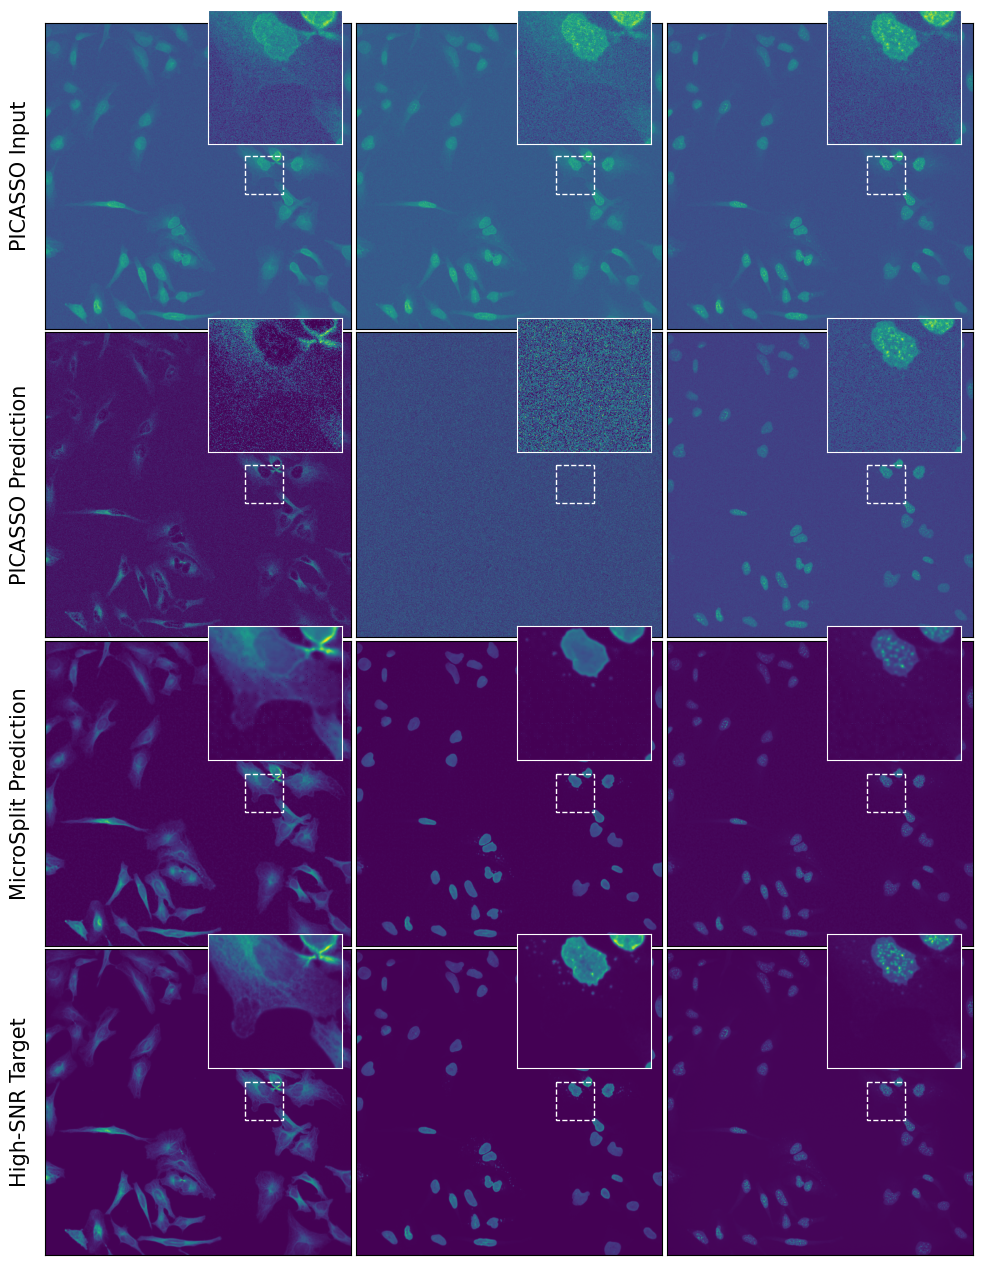

In [ ]:
from disentangle.analysis.plot_utils import clean_ax, add_subplot_axes
import matplotlib.patches as patches

idx = 0
inset_x = [0.6, 0.53, 0.46]
inset_y = [0.55, 0.6, 0.65, 0.7]
inset_rect = [0.6, 0.55, 0.5, 0.5]
inset_min_labelsize = 10

hN = wN = 200
hs = 700
ws = 1050


def add_inset(ax_, img, inset_rect, vmin=None, vmax=None):
    img_crop = img[hs : hs + hN, ws : ws + wN]
    inset_ax = add_subplot_axes(ax_, inset_rect, min_labelsize=inset_min_labelsize)
    inset_ax.imshow(img_crop, vmin=vmin, vmax=vmax)
    for spine in inset_ax.spines.values():
        spine.set_edgecolor("white")
    clean_ax(inset_ax)


_, ax = plt.subplots(figsize=(12, 16), ncols=3, nrows=4)
ax[0, 0].imshow(picasso_easy_input[idx, ..., 0])
ax[0, 1].imshow(picasso_easy_input[idx, ..., 1])
ax[0, 2].imshow(picasso_easy_input[idx, ..., 2])
add_inset(ax[0, 0], picasso_easy_input[idx, ..., 0], [inset_x[0], inset_y[0], 0.5, 0.5])
add_inset(ax[0, 1], picasso_easy_input[idx, ..., 1], [inset_x[1], inset_y[0], 0.5, 0.5])
add_inset(ax[0, 2], picasso_easy_input[idx, ..., 2], [inset_x[2], inset_y[0], 0.5, 0.5])


ax[1, 0].imshow(picasso_easy_pred[idx, ..., 0])
ax[1, 1].imshow(picasso_easy_pred[idx, ..., 1])
ax[1, 2].imshow(picasso_easy_pred[idx, ..., 2])
# add insets
add_inset(ax[1, 0], picasso_easy_pred[idx, ..., 0], [inset_x[0], inset_y[1], 0.5, 0.5])
add_inset(ax[1, 1], picasso_easy_pred[idx, ..., 1], [inset_x[1], inset_y[1], 0.5, 0.5])
add_inset(ax[1, 2], picasso_easy_pred[idx, ..., 2], [inset_x[2], inset_y[1], 0.5, 0.5])


ax[2, 0].imshow(microscplit_pred[idx, ..., 0], vmin=test_data[idx, ..., 0].min(), vmax=test_data[idx, ..., 0].max())
ax[2, 1].imshow(microscplit_pred[idx, ..., 1], vmin=test_data[idx, ..., 1].min(), vmax=test_data[idx, ..., 1].max())
ax[2, 2].imshow(microscplit_pred[idx, ..., 2], vmin=test_data[idx, ..., 2].min(), vmax=test_data[idx, ..., 2].max())
# # add insets
add_inset(
    ax[2, 0],
    microscplit_pred[idx, ..., 0],
    [inset_x[0], inset_y[2], 0.5, 0.5],
    vmin=test_data[idx, ..., 0].min(),
    vmax=test_data[idx, ..., 0].max(),
)
add_inset(
    ax[2, 1],
    microscplit_pred[idx, ..., 1],
    [inset_x[1], inset_y[2], 0.5, 0.5],
    vmin=test_data[idx, ..., 1].min(),
    vmax=test_data[idx, ..., 1].max(),
)
add_inset(
    ax[2, 2],
    microscplit_pred[idx, ..., 2],
    [inset_x[2], inset_y[2], 0.5, 0.5],
    vmin=test_data[idx, ..., 2].min(),
    vmax=test_data[idx, ..., 2].max(),
)

ax[3, 0].imshow(test_data[idx, ..., 0])
ax[3, 1].imshow(test_data[idx, ..., 1])
ax[3, 2].imshow(test_data[idx, ..., 2])
# add insets
add_inset(ax[3, 0], test_data[idx, ..., 0], [inset_x[0], inset_y[3], 0.5, 0.5])
add_inset(ax[3, 1], test_data[idx, ..., 1], [inset_x[1], inset_y[3], 0.5, 0.5])
add_inset(ax[3, 2], test_data[idx, ..., 2], [inset_x[2], inset_y[3], 0.5, 0.5])


for i in range(3):
    for j in range(4):
        rect_cur = patches.Rectangle((ws, hs), wN, hN, linewidth=1, edgecolor="w", linestyle="--", facecolor="none")
        ax[j, i].add_patch(rect_cur)

ax[0, 0].set_ylabel("PICASSO Input", fontsize=15)
ax[1, 0].set_ylabel("PICASSO Prediction", fontsize=15)
ax[2, 0].set_ylabel("MicroSplit Prediction", fontsize=15)
ax[3, 0].set_ylabel("High-SNR Target", fontsize=15)
clean_ax(ax)
# reduce spacing between subplots

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plot_fpath = os.path.join("/group/jug/ashesh/naturemethods/picassoPlots", f"comparison_with_picasso_easymode_{idx}.png")
print(plot_fpath)
plt.savefig(plot_fpath, dpi=300)
